In [97]:
import sys
sys.path.append("C:\\My stuffs\\Projects\\Object Detection\\pbj\\Lib\\site-packages")
import numpy as np
import pandas as pd
import datetime
import os
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

# to display all columns
pd.options.display.max_columns = None
pd.options.display.max_rows = None

## Read the data

In [5]:
data = pd.read_csv('C:\\My stuffs\\Projects\\Tensorflow 2.0 tutorial\\archive\\Turbine_data.csv')
data.head()

,Unnamed: 0,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
0,2017-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
1,2017-12-31 00:10:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2,2017-12-31 00:20:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
3,2017-12-31 00:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
4,2017-12-31 00:40:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN


## data information

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118224 entries, 0 to 118223
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    118224 non-null  object 
 1   ActivePower                   94750 non-null   float64
 2   AmbientTemperatue             93817 non-null   float64
 3   BearingShaftTemperature       62518 non-null   float64
 4   Blade1PitchAngle              41996 non-null   float64
 5   Blade2PitchAngle              41891 non-null   float64
 6   Blade3PitchAngle              41891 non-null   float64
 7   ControlBoxTemperature         62160 non-null   float64
 8   GearboxBearingTemperature     62540 non-null   float64
 9   GearboxOilTemperature         62438 non-null   float64
 10  GeneratorRPM                  62295 non-null   float64
 11  GeneratorWinding1Temperature  62427 non-null   float64
 12  GeneratorWinding2Temperature  62449 non-null

In [7]:
data.describe()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
count,94750.000000,93817.000000,62518.000000,41996.000000,41891.000000,41891.000000,62160.0,62540.000000,62438.000000,62295.000000,62427.000000,62449.000000,62406.000000,62507.000000,72278.000000,94748.000000,62127.000000,6.290800e+04,72278.000000,94595.000000
mean,619.109805,28.774654,43.010189,9.749641,10.036535,10.036535,0.0,64.234170,57.561217,1102.026269,72.460403,71.826659,36.897978,39.547603,196.290539,88.133966,9.907500,2.280429e+03,196.290539,5.878960
std,611.275373,4.369145,5.545312,20.644828,20.270465,20.270465,0.0,10.455556,6.323895,528.063946,22.627489,22.650255,5.178711,5.732783,88.296554,116.596725,4.718421,3.586034e+05,88.296554,2.619084
min,-38.524659,0.000000,0.000000,-43.156734,-26.443415,-26.443415,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-203.182591,0.000000,0.000000e+00,0.000000,0.000000
25%,79.642258,25.627428,39.840247,-0.939849,-0.433264,-0.433264,0.0,57.872242,53.942181,1029.812177,55.492241,54.763998,33.943949,35.812500,145.000000,-0.432137,9.231091,2.000000e+00,145.000000,3.823330
50%,402.654893,28.340541,42.910877,0.394399,0.888977,0.888977,0.0,64.834662,57.196089,1124.860720,65.788800,65.004946,37.003815,39.491310,182.000000,35.883659,10.098702,2.000000e+00,182.000000,5.557765
75%,1074.591780,31.664772,47.007976,8.099302,8.480194,8.480194,0.0,71.079306,61.305312,1515.402005,85.867449,85.337740,40.008425,43.359375,271.000000,147.359075,13.600413,2.000000e+00,271.000000,7.506710
max,1779.032433,42.405597,55.088655,90.143610,90.017830,90.017830,0.0,82.237932,70.764581,1809.941700,126.773031,126.043018,47.996185,54.250000,357.000000,403.713620,16.273495,6.574653e+07,357.000000,22.970893


In [25]:
# changing data type of unnamed:0 to datetime
df_updated=data.copy()
df_updated['Unnamed: 0']=pd.to_datetime(df_updated['Unnamed: 0'])

if df_updated['Blade2PitchAngle'].equals(df_updated['Blade3PitchAngle'])==True:
    df_updated.drop('Blade3PitchAngle', axis=1, inplace=True)

assert 'Blade3PitchAngle'  not in df_updated.columns, 'Column not present'
df_updated.head()


,Unnamed: 0,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
0,2017-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
1,2017-12-31 00:10:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2,2017-12-31 00:20:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
3,2017-12-31 00:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
4,2017-12-31 00:40:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN


## Checking for NULL Values

In [26]:
df_updated.isnull().sum()

Unnamed: 0                          0
ActivePower                     23474
AmbientTemperatue               24407
BearingShaftTemperature         55706
Blade1PitchAngle                76228
Blade2PitchAngle                76333
ControlBoxTemperature           56064
GearboxBearingTemperature       55684
GearboxOilTemperature           55786
GeneratorRPM                    55929
GeneratorWinding1Temperature    55797
GeneratorWinding2Temperature    55775
HubTemperature                  55818
MainBoxTemperature              55717
NacellePosition                 45946
ReactivePower                   23476
RotorRPM                        56097
TurbineStatus                   55316
WTG                                 0
WindDirection                   45946
WindSpeed                       23629
dtype: int64

### we will use forward fill to fillup and for some of the starting values forward fill will not work hence backward fill needs to be there as well

In [33]:
df_updated=df_updated.fillna(method='ffill').fillna(method='bfill')
df_updated.head()

,Unnamed: 0,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
0,2017-12-31 00:00:00+00:00,-5.357727,23.148729,47.901936,45.736893,43.699357,0.0,77.119133,64.204399,1751.715563,113.290871,112.592163,42.996094,41.898426,8.0,-9.96083,15.708135,0.0,G01,8.0,2.279088
1,2017-12-31 00:10:00+00:00,-5.357727,23.148729,47.901936,45.736893,43.699357,0.0,77.119133,64.204399,1751.715563,113.290871,112.592163,42.996094,41.898426,8.0,-9.96083,15.708135,0.0,G01,8.0,2.279088
2,2017-12-31 00:20:00+00:00,-5.357727,23.148729,47.901936,45.736893,43.699357,0.0,77.119133,64.204399,1751.715563,113.290871,112.592163,42.996094,41.898426,8.0,-9.96083,15.708135,0.0,G01,8.0,2.279088
3,2017-12-31 00:30:00+00:00,-5.357727,23.148729,47.901936,45.736893,43.699357,0.0,77.119133,64.204399,1751.715563,113.290871,112.592163,42.996094,41.898426,8.0,-9.96083,15.708135,0.0,G01,8.0,2.279088
4,2017-12-31 00:40:00+00:00,-5.357727,23.148729,47.901936,45.736893,43.699357,0.0,77.119133,64.204399,1751.715563,113.290871,112.592163,42.996094,41.898426,8.0,-9.96083,15.708135,0.0,G01,8.0,2.279088


In [35]:
df_updated.rename(columns={"Unnamed: 0" : "date_column"}, inplace=True)

In [106]:
df = df_updated[['date_column', 'ActivePower', 'WindSpeed', 'GeneratorRPM', 'ReactivePower', 'RotorRPM', 'AmbientTemperatue', \
                 'WindDirection', 'Blade1PitchAngle', 'Blade2PitchAngle', 'HubTemperature', 'MainBoxTemperature', 'GearboxBearingTemperature', \
                 'GearboxOilTemperature', 'GearboxOilTemperature',	'GeneratorRPM',	'GeneratorWinding1Temperature',	'GeneratorWinding2Temperature','HubTemperature',	'MainBoxTemperature',	'NacellePosition',	'ReactivePower',	'RotorRPM','TurbineStatus',	'WindDirection',	'WindSpeed']].copy()

In [107]:
df['weekday']=df['date_column'].dt.dayofweek
df.head()
ohe=pd.get_dummies(df['weekday'])
df=df.join(ohe)
df.drop('weekday', axis=1, inplace=True)
date=pd.to_datetime(df.pop('date_column'))
# df.head()


In [108]:
df.isnull().sum()

ActivePower                     0
WindSpeed                       0
GeneratorRPM                    0
ReactivePower                   0
RotorRPM                        0
AmbientTemperatue               0
WindDirection                   0
Blade1PitchAngle                0
Blade2PitchAngle                0
HubTemperature                  0
MainBoxTemperature              0
GearboxBearingTemperature       0
GearboxOilTemperature           0
GearboxOilTemperature           0
GeneratorRPM                    0
GeneratorWinding1Temperature    0
GeneratorWinding2Temperature    0
HubTemperature                  0
MainBoxTemperature              0
NacellePosition                 0
ReactivePower                   0
RotorRPM                        0
TurbineStatus                   0
WindDirection                   0
WindSpeed                       0
0                               0
1                               0
2                               0
3                               0
4             

:snowflake:

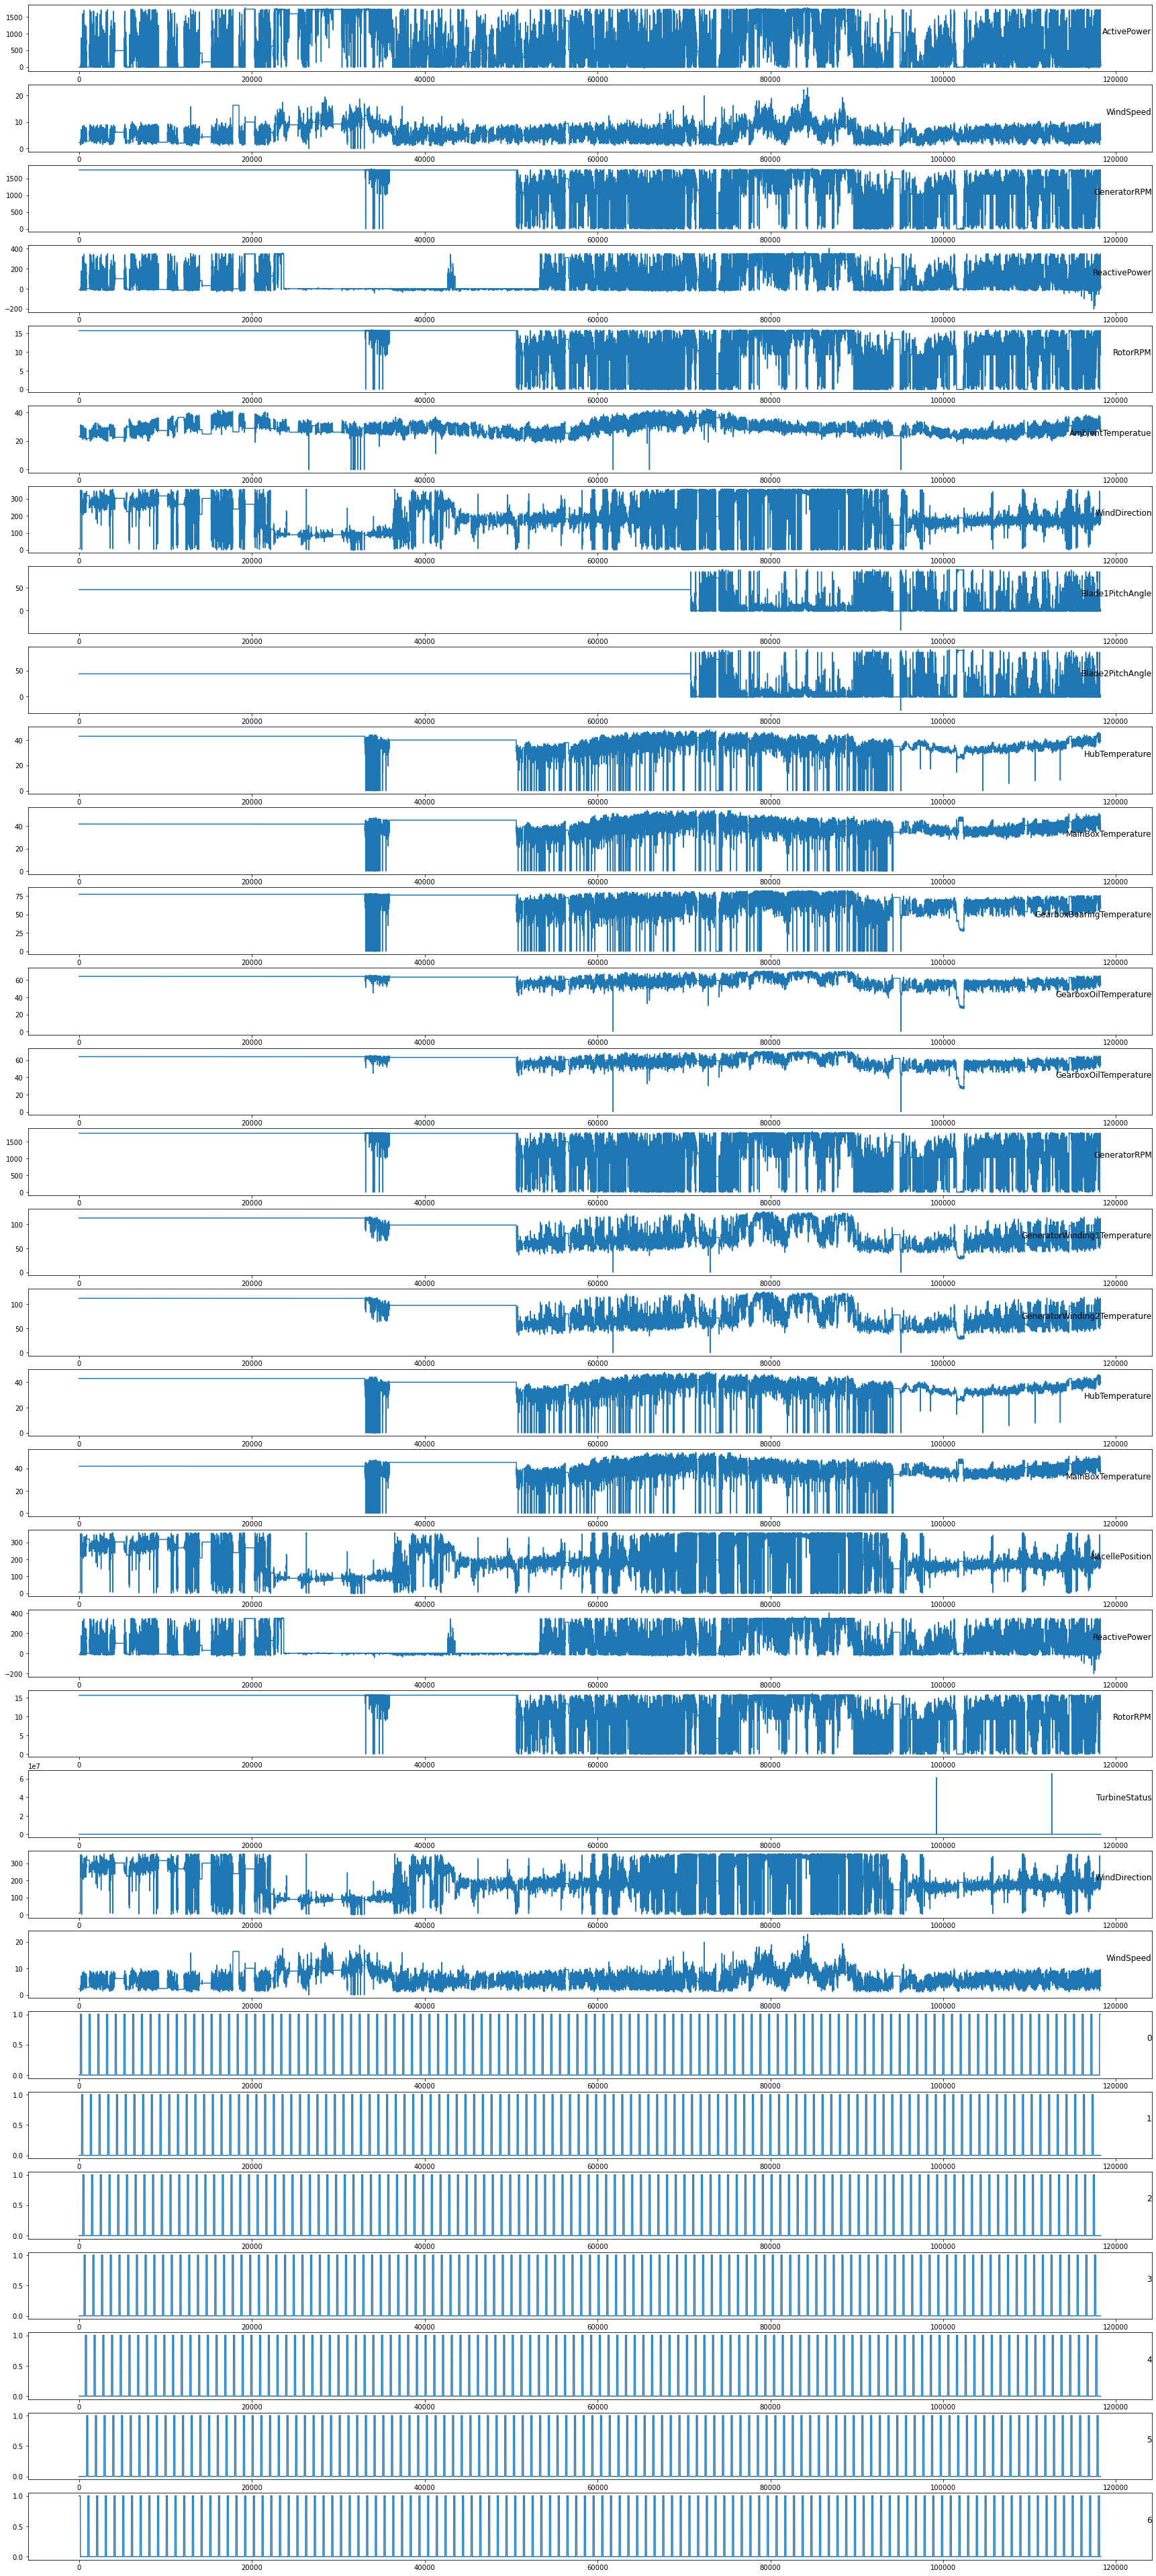

In [109]:
from matplotlib import pyplot as plt

values=df.values

groups=[i for i in range(len(df.columns))]

i = 1
#ploting each column
plt.figure(figsize=(30,70))

for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(df.columns[group], y = 0.5, loc = 'right')
    i += 1
plt.show()
    




## we will convert it to supervised problem

In [117]:
def series_to_supervised(data, n_in = 1, n_out = 1, dropnan = True):
   n_vars = 1 if type(data) is list else data.shape[1]
   df=pd.DataFrame(data)
   cols, names=list(), list()
   ## input sequence (t-n, ... t-1)
   for i in range(n_in, 0, -1):
    cols.append(df.shift(i))
    names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
   ## forecast sequence (t, t+1, ... t+n)
   for i in range(0, n_out):
    cols.append(df.shift(-i))
    if i == 0:
        names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
    else:
	    names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    ## put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names

    if dropnan == True:
        agg.dropna(inplace = True)
    return agg


In [121]:
values.dtype
scalar=MinMaxScaler(feature_range=(0,1))
scaled=scalar.fit_transform(values)
reframed=series_to_supervised(scaled, 1, 1)

In [122]:
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),var11(t-1),var12(t-1),var13(t-1),var14(t-1),var15(t-1),var16(t-1),var17(t-1),var18(t-1),var19(t-1),var20(t-1),var21(t-1),var22(t-1),var23(t-1),var24(t-1),var25(t-1),var26(t-1),var27(t-1),var28(t-1),var29(t-1),var30(t-1),var31(t-1),var32(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t),var9(t),var10(t),var11(t),var12(t),var13(t),var14(t),var15(t),var16(t),var17(t),var18(t),var19(t),var20(t),var21(t),var22(t),var23(t),var24(t),var25(t),var26(t),var27(t),var28(t),var29(t),var30(t),var31(t),var32(t)
1,0.018248,0.099216,0.96783,0.318377,0.965259,0.545889,0.022409,0.666867,0.602284,0.895823,0.772321,0.937756,0.907296,0.907296,0.96783,0.893651,0.893284,0.895823,0.772321,0.022409,0.318377,0.965259,0.0,0.022409,0.099216,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.018248,0.099216,0.96783,0.318377,0.965259,0.545889,0.022409,0.666867,0.602284,0.895823,0.772321,0.937756,0.907296,0.907296,0.96783,0.893651,0.893284,0.895823,0.772321,0.022409,0.318377,0.965259,0.0,0.022409,0.099216,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.018248,0.099216,0.96783,0.318377,0.965259,0.545889,0.022409,0.666867,0.602284,0.895823,0.772321,0.937756,0.907296,0.907296,0.96783,0.893651,0.893284,0.895823,0.772321,0.022409,0.318377,0.965259,0.0,0.022409,0.099216,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.018248,0.099216,0.96783,0.318377,0.965259,0.545889,0.022409,0.666867,0.602284,0.895823,0.772321,0.937756,0.907296,0.907296,0.96783,0.893651,0.893284,0.895823,0.772321,0.022409,0.318377,0.965259,0.0,0.022409,0.099216,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.018248,0.099216,0.96783,0.318377,0.965259,0.545889,0.022409,0.666867,0.602284,0.895823,0.772321,0.937756,0.907296,0.907296,0.96783,0.893651,0.893284,0.895823,0.772321,0.022409,0.318377,0.965259,0.0,0.022409,0.099216,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.018248,0.099216,0.96783,0.318377,0.965259,0.545889,0.022409,0.666867,0.602284,0.895823,0.772321,0.937756,0.907296,0.907296,0.96783,0.893651,0.893284,0.895823,0.772321,0.022409,0.318377,0.965259,0.0,0.022409,0.099216,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.018248,0.099216,0.96783,0.318377,0.965259,0.545889,0.022409,0.666867,0.602284,0.895823,0.772321,0.937756,0.907296,0.907296,0.96783,0.893651,0.893284,0.895823,0.772321,0.022409,0.318377,0.965259,0.0,0.022409,0.099216,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.018248,0.099216,0.96783,0.318377,0.965259,0.545889,0.022409,0.666867,0.602284,0.895823,0.772321,0.937756,0.907296,0.907296,0.96783,0.893651,0.893284,0.895823,0.772321,0.022409,0.318377,0.965259,0.0,0.022409,0.099216,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.018248,0.099216,0.96783,0.318377,0.965259,0.545889,0.022409,0.666867,0.602284,0.895823,0.772321,0.937756,0.907296,0.907296,0.96783,0.893651,0.893284,0.895823,0.772321,0.022409,0.318377,0.965259,0.0,0.022409,0.099216,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.018248,0.099216,0.96783,0.318377,0.965259,0.545889,0.022409,0.666867,0.602284,0.895823,0.772321,0.937756,0.907296,0.907296,0.96783,0.893651,0.893284,0.895823,0.772321,0.022409,0.318377,0.965259,0.0,0.022409,0.099216,0.0,0.0,0.0,0.0,0.0,0.0,1.0
